In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Visualizing numeric columns
numeric_cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        numeric_cols.append(col)
numeric_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

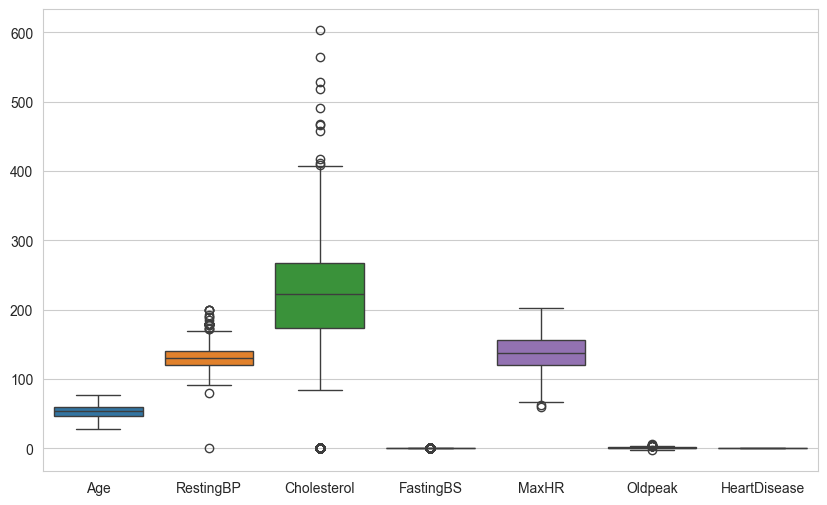

In [9]:
# Boxplot for numeric columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.show()

In [17]:
# Use IQR for numeric columns
for col in numeric_cols:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = df[(df[col]<lower) | (df[col]>upper)]
    print(f"Number of outliers detected in {col}:",len(outliers))

Number of outliers detected in Age: 0
Number of outliers detected in RestingBP: 28
Number of outliers detected in Cholesterol: 183
Number of outliers detected in FastingBS: 214
Number of outliers detected in MaxHR: 2
Number of outliers detected in Oldpeak: 16
Number of outliers detected in HeartDisease: 0


In [19]:
# Removing outliers
for col in numeric_cols:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    no_outliers = df[(df[col]>=lower) & (df[col]<=upper)]
    print(f"No outliers in {col}",no_outliers)

No outliers in Age      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      1

Capped Age 0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64
Capped RestingBP 0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64
Capped Cholesterol 0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64
Capped FastingBS 0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    0
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64
Capped MaxHR 0      172
1      156
2       98
3      108
4      122
      ... 
913    132
914    141
915    115
916    174
917    173
Name: MaxHR, Length: 918, dtype: int64
Capped Oldpeak 0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916   

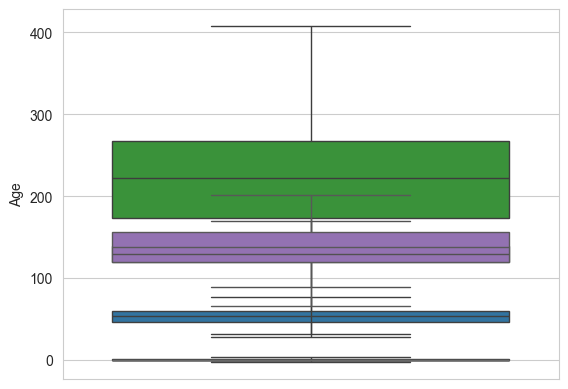

In [30]:
# Cap outliers(winsorization-like approach)
# Replacing all the values less than lower with lower and all the values greater than upper than upper
for col in numeric_cols:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    capped = df[col].clip(lower,upper)
    sns.boxplot(data=capped)
    print(f'Capped {col}',capped)


In [32]:
# Log transformation(for skewed distribution)
df_log = df.copy()
df_log['Cholesterol'+'_log'] = np.log(df_log['Cholesterol'] + 1)
# Warning: Outliers will still present after applying log-transformation
q1 = df_log['Cholesterol'].quantile(.25)
q3 = df_log['Cholesterol'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outliers = df_log[(df_log['Cholesterol']<lower) | (df_log['Cholesterol']>upper)]
print(f"Number of outliers detected in Cholesterol:",len(outliers))

Number of outliers detected in Cholesterol: 183


##### Feature transformation and domain driven features

In [39]:
poly_cols = ['Age','MaxHR']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[poly_cols])
poly_features_names = poly.get_feature_names_out(poly_cols)

numpy.ndarray

##### Binning age into categories(young,middle,old)

In [43]:
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[0,20,40,55,70],
    labels=['Young','Middle','Middle_old','Old']
)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Middle
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Middle_old
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Middle
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Middle_old
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Middle_old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,Middle_old
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,Old
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,Old
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,Old


In [48]:
def bp_risk(bp):
    if bp<120:
        return "Normal"
    elif bp<140:
        return "Elavated"
    return "High"

def oldpeak_risk(op):
    if op==0:
        return "No Stress"
    elif op<2:
        return "Moderate Stress"
    return "High Stress"
df['BP_Risk'] = df['RestingBP'].apply(bp_risk)
df['Oldpeak_Risk'] = df['Oldpeak'].apply(bp_risk)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bin,BP_Risk,Oldpeak_Risk
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Middle,High,Normal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Middle_old,High,Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Middle,Elavated,Normal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Middle_old,Elavated,Normal
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Middle_old,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,Middle_old,Normal,Normal
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,Old,High,Normal
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,Old,Elavated,Normal
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,Old,Elavated,Normal


##### Processing Pipeline

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
# Numerical Pipeline
num_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_features = ['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope']
num_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

In [58]:
# Categorical Pipeline
cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])

In [59]:
# Combine both pipeline
preprocess = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
])

In [64]:
# Full pipeline
clf = Pipeline([
    ('prep',preprocess),
    ('model',LogisticRegression(max_iter=1000))
])
clf

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
# Test Train Split
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
X_train_pipe,X_test_pipe,y_train_pipe,y_test_pipe=train_test_split(X,y,test_size=.25,random_state=42)
# Fit the full pipeline
clf.fit(X_train_pipe,y_train_pipe)
# Predict and evaluate
y_pred_pipe = clf.predict(X_test_pipe)
acc = accuracy_score(y_test_pipe,y_pred_pipe)
print(f'Logistic Regression with preprocessing pipeline {round(acc*100,2)}')

Logistic Regression with preprocessing pipeline 84.35
